CAPSTONE 1 REQUIREMENTS

1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.
*****************************************

MY PROJECT'S THEME: Ramen data analytics

DESCRIPTION OF THE DATASET

This dataset was originally published by "The Ramen Rater", and released on Kaggle. The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. It contains a review id, brand, variety(the product name), style(cup, bowl, or tray?), country, and stars. Stars indicate the ramen quality assessed by the reviewer on 5 point scale.
I chose this dataset because I am interested in food (especially in Japanese food) and want to see people's preferences in Japanese food.

ANALYTIC QUESTIONS
 #1 Which country produces ramen the most? And which countries make highly rated ramens?(Find top 3 countries)
 #2 How stars distributed in each top 3 country's ramens?
 #3 How styles and brand affect the ratings?

****************************************************************************************************************************************
 #1 Which country produces ramen the most? And which countries make highly rated ramens?(Find top 3 countries)
 

Let's start with checking the number of ramens for each country.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Text(0, 0.5, 'Ramens Count')

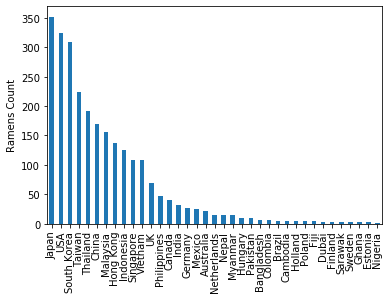

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ramens = pd.read_csv('ramen-ratings.csv')

ramens.info()

# Integrate data of "United States" & "USA"
ramens["Country"].replace("United States", "USA", inplace=True)
        
ramens.Country.value_counts().plot(kind="bar")
plt.ylabel("Ramens Count")

There are clear reasons for the top 3 countries. Understandably, Japan makes ramens the most because ramen is originally from Japan. Also, the number of USA ramens is the second biggest since this dataset is made in the USA. Regarding South Korea, they have a similar culture like Japan, and they make many ramens because ramen is also popular in South Korea.

Next, let's see which countries make highly rated ramens? I define "highly rated ramen" as "the ramen which has over four stars rating."

Text(0, 0.5, 'Highly Rated Ramens Count')

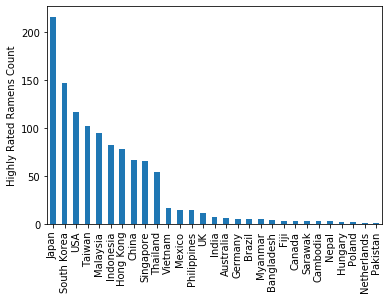

In [2]:
# Find ramens which has over 4 stars
high_rated = ramens[ramens["Stars"] >= "4"]

high_rated.Country.value_counts().plot(kind="bar")
plt.ylabel("Highly Rated Ramens Count")

When we see the top 3 countries, it is natural that Japan has highly rated ramens the most because they produce ramens the most. However, the ranking of South Korea and the USA is flipped compared to the number of ramens. Also, the difference between Japan and other countries got bigger.

Let's see the ratio of highly rated ramens for each country to investigate the reason for the above.

Japan:  61.36363636363637
South Korea:  47.57281553398058
USA:  36.11111111111111


Text(0, 0.5, 'Highly Rated Ratio')

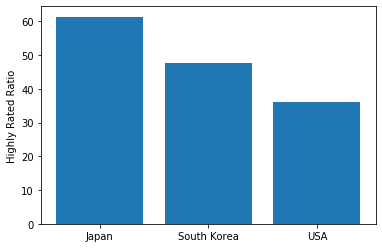

In [3]:
# Find each country's total number of ramens
japanese_ramen = ramens[(ramens["Country"] == "Japan")]
korean_ramen = ramens[ramens["Country"] == "South Korea"]
us_ramen = ramens[ramens["Country"] == "USA"]

# Find each country's number of highly rated ramens
high_rated_japanese_ramen = ramens[(ramens["Country"] == "Japan")& (ramens["Stars"] >= '4')]
high_rated_korean_ramen = ramens[(ramens["Country"] == "South Korea")& (ramens["Stars"] >= '4')]
high_rated_us_ramen = ramens[(ramens["Country"] == "USA")& (ramens["Stars"] >= '4')]

# Check the ratio for highly rated ramens in each country
japanese_high_ratio=len(high_rated_japanese_ramen)/len(japanese_ramen)*100
korean_high_ratio=len(high_rated_korean_ramen)/len(korean_ramen)*100
us_high_ratio=len(high_rated_us_ramen)/len(us_ramen)*100

print("Japan: ", japanese_high_ratio)
print("South Korea: ", korean_high_ratio)
print("USA: ", us_high_ratio)

names = ["Japan", "South Korea", "USA"]
values =[japanese_high_ratio, korean_high_ratio, us_high_ratio]
plt.bar(names, values)
plt.ylabel("Highly Rated Ratio")



Over 60% of Japanese ramens get a high score; on the other hand, only 47 % of Korean ramens, and 36% of the USA ramens get a high score. That is the reason for the change in the previous chart.
************************************

#2 How stars distributed in each top 3 country's ramens?

Next, I will analyze star distribution in each top 3 countries.

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Review #                                                          \
               count         mean         std   min     25%     50%      75%   
Country                                                                        
Japan          352.0  1375.928977  774.640726  12.0  688.50  1391.5  2002.25   
South Korea    307.0  1003.863192  752.850783   9.0  394.50   828.0  1416.00   
USA            324.0  1089.570988  721.102375   1.0  471.75   942.0  1683.00   

                     Stars                                                  
                max  count      mean       std  min  25%    50%   75%  max  
Country                                                                     
Japan        2580.0  352.0  3.981605  0.913755  0.0  3.5  4.000  4.75  5.0  
South Korea  2575.0  307.0  3.790554  0.869436  0.0  3.5  3.750  4.25  5.0  
USA          2578.0  324.0  3.457948  1.054263  0.0  3.0  3.625  4.00  5.0

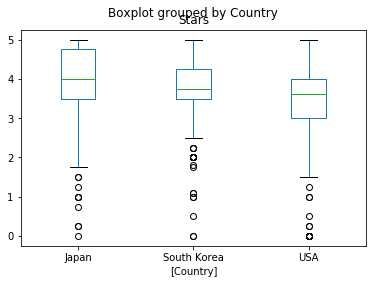

In [4]:
# Find top 3 countries by the number of ramens
top3countries_list = ramens["Country"].value_counts()[:3].index
data_top3countries = ramens[ramens['Country'].isin(top3countries_list)]

# Clean up the data in "Stars" because some ramens are unrated. Then, convert strings to float numbers.
stars=(data_top3countries[ramens['Stars'] != 'Unrated'])
stars["Stars"]=stars["Stars"].astype(float)

stars.boxplot(by=['Country'], column=["Stars"], grid=False)
stars.groupby(['Country']).describe()

As we can see, Japanese ramen's mean is nearly 4 stars, and most of the interquartile range is in the highly-rated area. Also, we can see Korean ramen's quality is the most stable by its interquartile range. USA ramens' interquartile range is spread in 3 stars - 4 stars area, and the quality looks like not stable.

I wonder why this happens. So, let's check distribution plot.

Text(0.5, 1.0, 'USA Distribution of Stars')

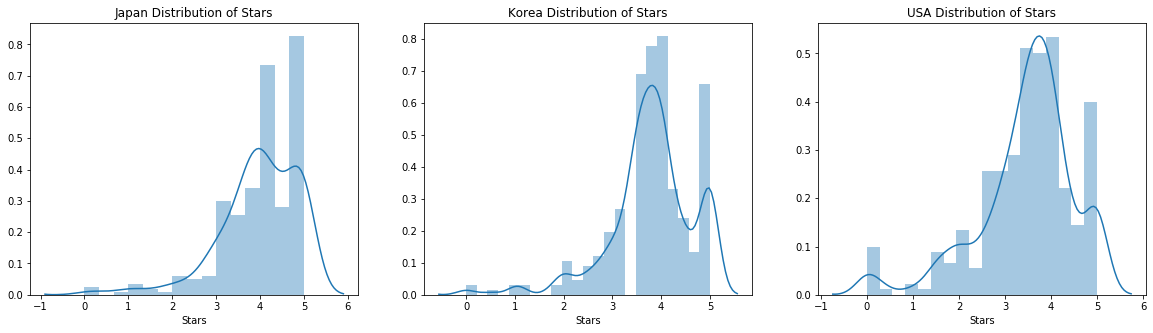

In [26]:
japan_stars=stars[(stars["Country"] == "Japan")]
korea_stars=stars[(stars["Country"]=="South Korea")]
us_stars=stars[(stars["Country"]=="USA")]


f, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(japan_stars["Stars"], ax=ax[0]).set_title("Japan Distribution of Stars")
sns.distplot(korea_stars["Stars"], ax=ax[1]).set_title("Korea Distribution of Stars")
sns.distplot(us_stars["Stars"], ax=ax[2]).set_title("USA Distribution of Stars")


What can I say?

#3 How styles and brand affect the ratings?

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


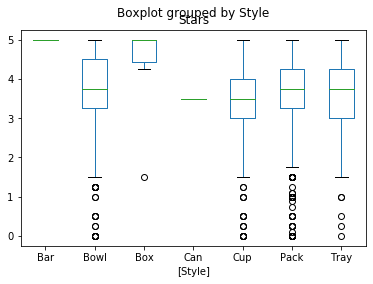

In [32]:
all_ramens_stars=(ramens[ramens['Stars'] != 'Unrated'])
all_ramens_stars["Stars"]=all_ramens_stars["Stars"].astype(float)
all_ramens_stars.boxplot(by=['Style'], column=["Stars"], grid=False)
# data_top3countries.boxplot(by=['Brand'], column=numeric_stars, grid=False)  
